In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import datetime
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jacky\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Authentication
consumerKey = "j2HLMNKcJVCXHHuIF4bbEzkxR"
consumerSecret = "diiP7qGRJzjHxmlqZa82RU2jhb4MO6yiAvE1LQc6UKRgyxlIWe"
accessToken = "1151158430-LqBpQnbZehIALIlEsk0p55zNodWUuxj9H75MWXO"
accessTokenSecret = "VLFlAKajDDchqvVeyVsFUdVaCAPphlFSo2Hxk9kt28FxU"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [33]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "Mehmet Oz -filter:retweets"
noOfTweet = 5000
until_date = "2022-10-16"

tweets = tweepy.Cursor(api.search_tweets, q=keyword, until=until_date).items(noOfTweet)

In [34]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
date_list = []
neutral_list = []
negative_list = []
positive_list = []
i = 1
for tweet in tweets:
 
    print(i)
    tweet_list.append(tweet.text)
    date_list.append(tweet.created_at.date())
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

    i += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Rate limit reached. Sleeping for: 42


1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654


3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300


Rate limit reached. Sleeping for: 840


4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285


In [35]:
set(date_list)

{datetime.date(2022, 10, 8),
 datetime.date(2022, 10, 9),
 datetime.date(2022, 10, 10),
 datetime.date(2022, 10, 11),
 datetime.date(2022, 10, 12),
 datetime.date(2022, 10, 13),
 datetime.date(2022, 10, 14),
 datetime.date(2022, 10, 15)}

In [36]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)

positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

tweet_list

total number:  5000
positive number:  1181
negative number:  1623
neutral number:  2196


,0
0,@danbo9041 He's recovering from a stroke. He'l...
1,#PaSen candidate is a total sham. Dr oZ uses t...
2,@JuliaTerruso You still have this tweet up? It...
3,MEHMET OZ IS 24 DAYS FROM VICTORY
4,Mehmet Oz Busted: Woman He ‘Comforted’ At Even...
...,...
4995,Conservatives will blame gun violence on every...
4996,@DrOz If You were in Jail for using Medical Ma...
4997,Mehmet Oz Gives Speech Near Hitler’s Car And C...
4998,@Damian80343006 @CinnersCorner @MezcalMama @Na...


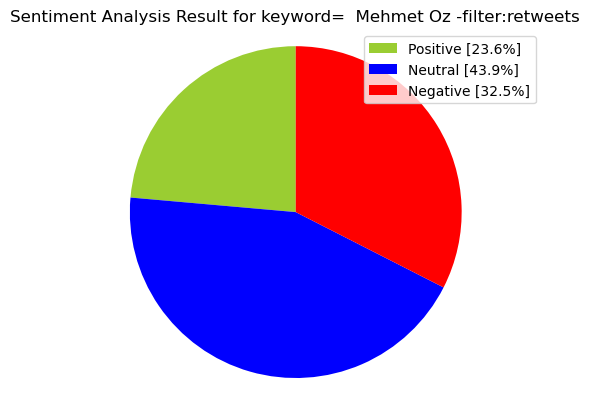

In [37]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()


In [40]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "John Fetterman -filter:retweets"
noOfTweet = 5000
until_date = "2022-10-16"

tweets2 = tweepy.Cursor(api.search_tweets, q=keyword, until=until_date).items(noOfTweet)

In [41]:
positive2 = 0
negative2 = 0
neutral2 = 0
polarity2 = 0
tweet_list2 = []
date_list2 = []
neutral_list2 = []
negative_list2 = []
positive_list2 = []
i = 1
for tweet in tweets2:
 
    print(i)
    tweet_list2.append(tweet.text)
    date_list2.append(tweet.created_at.date())
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity2 += analysis.sentiment.polarity

    if neg > pos:
        negative_list2.append(tweet.text)
        negative2 += 1
    elif pos > neg:
        positive_list2.append(tweet.text)
        positive2 += 1

    elif pos == neg:
        neutral_list2.append(tweet.text)
        neutral2 += 1

    i += 1

positive2 = percentage(positive2, noOfTweet)
negative2 = percentage(negative2, noOfTweet)
neutral2 = percentage(neutral2, noOfTweet)
polarity2 = percentage(polarity2, noOfTweet)
positive2 = format(positive2, '.1f')
negative2 = format(negative2, '.1f')
neutral2 = format(neutral2, '.1f')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Rate limit reached. Sleeping for: 748


1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883


3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522


Rate limit reached. Sleeping for: 829


4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499


In [43]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list2 = pd.DataFrame(tweet_list2)
neutral_list2 = pd.DataFrame(neutral_list2)
negative_list2 = pd.DataFrame(negative_list2)
positive_list2 = pd.DataFrame(positive_list2)
print("total number: ",len(tweet_list2))
print("positive number: ",len(positive_list2))
print("negative number: ", len(negative_list2))
print("neutral number: ",len(neutral_list2))

total number:  5000
positive number:  1461
negative number:  1556
neutral number:  1983


In [44]:
tweet_list2.drop_duplicates(inplace = True)

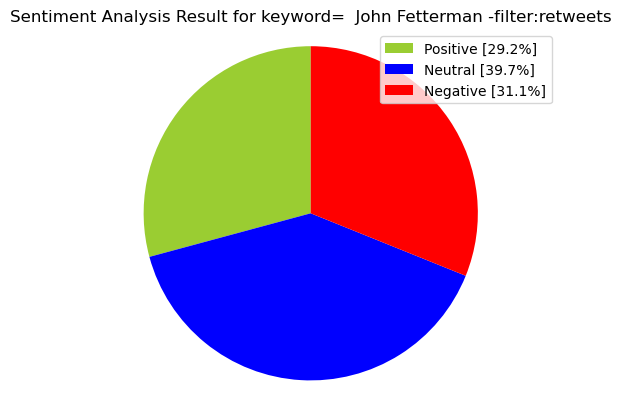

In [45]:
#Creating PieCart

labels = ['Positive ['+str(positive2)+'%]' , 'Neutral ['+str(neutral2)+'%]','Negative ['+str(negative2)+'%]']
sizes = [positive2, neutral2, negative2]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [116]:
keyword = "Mehmet Oz"
tweets = tweepy.Cursor(api.search_30_day, label='search', query=keyword, fromDate="202210060000", toDate="202210062300").items(2000)

In [66]:
def dailyscore(tweets):
    positive = 0
    negative = 0
    neutral = 0
    polarity = 0
    tweet_list = []
    date_list = []
    neutral_list = []
    negative_list = []
    positive_list = []
    i = 1
    for tweet in tweets:

        print(i)
        tweet_list.append(tweet.text)
        date_list.append(tweet.created_at.date())
        analysis = TextBlob(tweet.text)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        polarity += analysis.sentiment.polarity

        if neg > pos:
            negative_list.append(tweet.text)
            negative += 1
        elif pos > neg:
            positive_list.append(tweet.text)
            positive += 1

        elif pos == neg:
            neutral_list.append(tweet.text)
            neutral += 1

        i += 1

    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    polarity = percentage(polarity, noOfTweet)
    positive = format(positive, '.1f')
    negative = format(negative, '.1f')
    neutral = format(neutral, '.1f')
    return polarity

In [117]:
fromdates = ["202210070000", "202210080000", "202210090000", "202210100000", "202210110000", "202210120000", "202210130000"] 
todates = ["202210072300", "202210082300", "202210092300", "202210102300", "202210112300", "202210122300", "202210132300"] 
scores = []

In [122]:
scores

[0.9675420634920663, -1.285634740259748]

In [124]:
for i in range(4, 7):
    print(fromdates[i])
    tweets = tweepy.Cursor(api.search_30_day, label='search', query=keyword, fromDate=fromdates[i], toDate=todates[i]).items(1000)
    scores.append(dailyscore(tweets))

202210110000
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274

201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450


In [126]:
scores

[0.9675420634920663,
 -1.285634740259748,
 0.7356717532467532,
 -1.3650671134421115,
 4.563530663780568,
 3.591747270322276,
 0.9393074795574697]

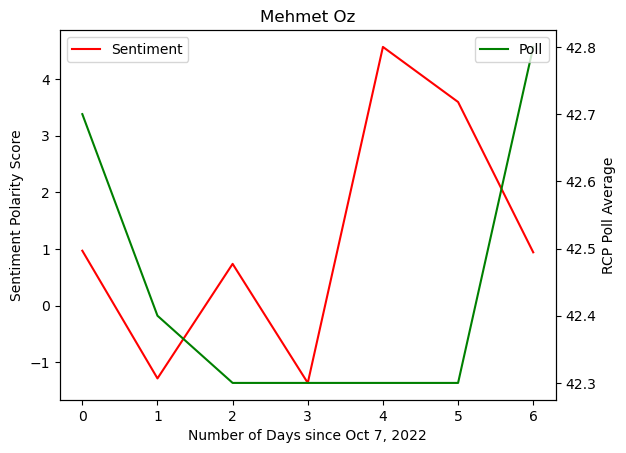

In [127]:
days = range(7)
polls = np.array([42.7, 42.4, 42.3,  42.3, 42.3, 42.3, 42.8])

fig, ax1 = plt.subplots() 

ax2 = ax1.twinx() 

ax1.plot(days, scores, label='Sentiment', color='r')
ax2.plot(days, polls, label='Poll', color='g')
handle1, label1 = ax1.get_legend_handles_labels()
handle2, label2 = ax2.get_legend_handles_labels()
ax1.set_ylabel("Sentiment Polarity Score")
ax1.set_xlabel("Number of Days since Oct 7, 2022")
ax2.set_ylabel("RCP Poll Average")
ax1.legend(handle1, label1,loc='upper left')
ax2.legend(handle2, label2, loc='upper right')
ax1.set_title("Mehmet Oz")
plt.show()

In [131]:
keyword = "John Fetterman"

scores1 = []

In [134]:
for i in range(4, 7):
    print(fromdates[i])
    tweets = tweepy.Cursor(api.search_full_archive, label='full', query=keyword, fromDate=fromdates[i], toDate=todates[i]).items(700)
    scores1.append(dailyscore(tweets))

202210110000
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274

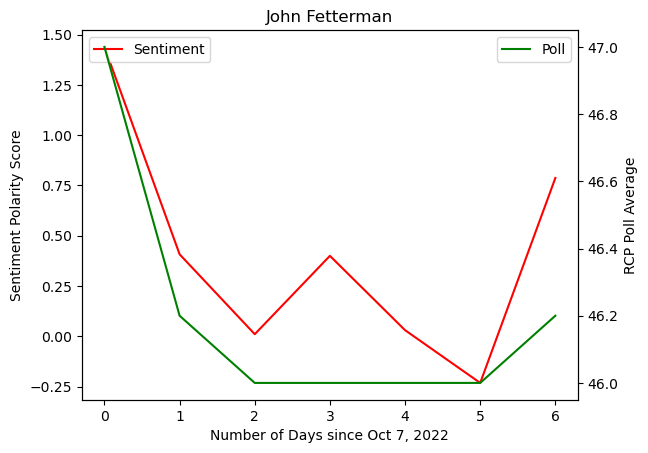

In [135]:
polls = np.array([47.0, 46.2, 46.0,  46.0, 46.0, 46.0, 46.2])

fig, ax1 = plt.subplots() 

ax2 = ax1.twinx() 

ax1.plot(days, scores1, label='Sentiment', color='r')
ax2.plot(days, polls, label='Poll', color='g')
handle1, label1 = ax1.get_legend_handles_labels()
handle2, label2 = ax2.get_legend_handles_labels()
ax1.set_ylabel("Sentiment Polarity Score")
ax1.set_xlabel("Number of Days since Oct 7, 2022")
ax2.set_ylabel("RCP Poll Average")
ax1.legend(handle1, label1,loc='upper left')
ax2.legend(handle2, label2, loc='upper right')
ax1.set_title("John Fetterman")
plt.show()

In [136]:
scores1

[1.4383430134680129,
 0.40780904882154956,
 0.010682972582972777,
 0.40009282661782675,
 0.03074741462241472,
 -0.23146443963444027,
 0.7870506553631555]